## TIME SERIES ANALYSIS




My journey will go throuugh steps for the Time Series Analysis

    1)Loading and Handling Time Series in Pandas

    2)Checking Stationarity of the Time Series

    3)Making the Time Series Stationary

    4)Buildiing the ARIMA model
    
    5) Final forecasting
    
    5)Converting stationary to the original

In [437]:
# loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6
import warnings
warnings.filterwarnings('ignore')

In [438]:
# reading the file
df = pd.read_csv('C:/Users/mohsun.haziyev/Desktop/test_bond.csv')

In [439]:
df.head()

,date,10Y Bond
0,01-03-2018,2.848
1,28-02-2018,2.864
2,27-02-2018,2.901
3,26-02-2018,2.864
4,25-02-2018,2.875


In [440]:
print df.head()
print '\n Data Types:'
print df.dtypes

         date  10Y Bond
0  01-03-2018     2.848
1  28-02-2018     2.864
2  27-02-2018     2.901
3  26-02-2018     2.864
4  25-02-2018     2.875

 Data Types:
date         object
10Y Bond    float64
dtype: object


In [441]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y') 

In [442]:
# Making date as index
df = pd.read_csv('C:/Users/mohsun.haziyev/Desktop/test_bond.csv', index_col='date', date_parser=dateparse) 
df.head()

,10Y Bond
date,
2018-03-01,2.848
2018-02-28,2.864
2018-02-27,2.901
2018-02-26,2.864
2018-02-25,2.875


In [443]:
# Converting column to index column - personal preference
df = df['10Y Bond']
df.head()

date
2018-03-01    2.848
2018-02-28    2.864
2018-02-27    2.901
2018-02-26    2.864
2018-02-25    2.875
Name: 10Y Bond, dtype: float64

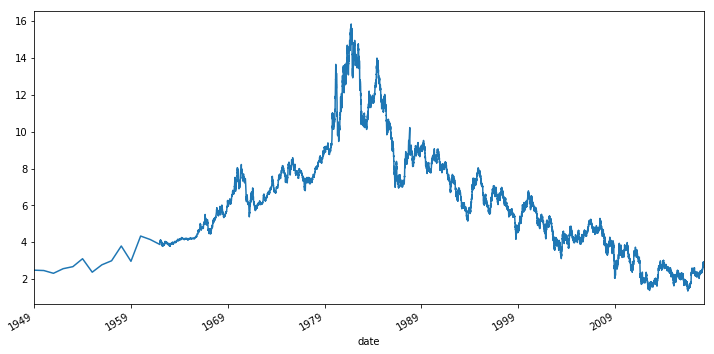

In [444]:
# plotting the original data
df.plot()

In [445]:
# disregard initial 14 years because there is just a rate per year from 1948 to 1962 
df.drop(df.tail(14).index,inplace=True)

In [446]:
# when alaysed it was observed that financial crisis of 2008 has a very strong impact in bond rates, so it should be analysed seperately
df.drop(df.head(2861).index,inplace=True)

In [447]:
df.head()

date
2007-12-31    4.035
2007-12-28    4.077
2007-12-27    4.203
2007-12-26    4.283
2007-12-24    4.214
Name: 10Y Bond, dtype: float64

In [448]:
df.tail()

date
1962-01-08    4.03
1962-01-05    4.02
1962-01-04    3.99
1962-01-03    4.03
1962-01-02    4.06
Name: 10Y Bond, dtype: float64

# Checking for stationarity

## Plot the time - series

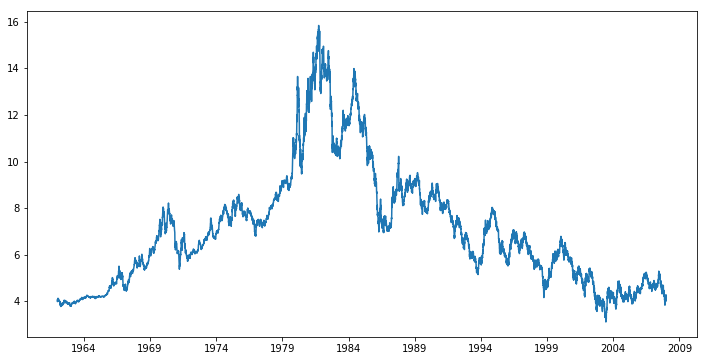

In [449]:
# plotting the data
plt.plot(df)

In [450]:
# stationarity test formula
from pandas import Series
from statsmodels.tsa.stattools import adfuller
def stationarity_test(timeseries):
    
    #Defining rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=3)
    rolstd = pd.rolling_std(timeseries, window=3)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    series = Series.from_csv('C:/Users/mohsun.haziyev/Desktop/test_bond.csv', header=0)
    X = series.values
    result = adfuller(X, autolag='AIC')
    dfoutput = pd.Series(result[1:4], index=['p-value', '# of lags', '# of observations'])
    for key, value in result[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print dfoutput


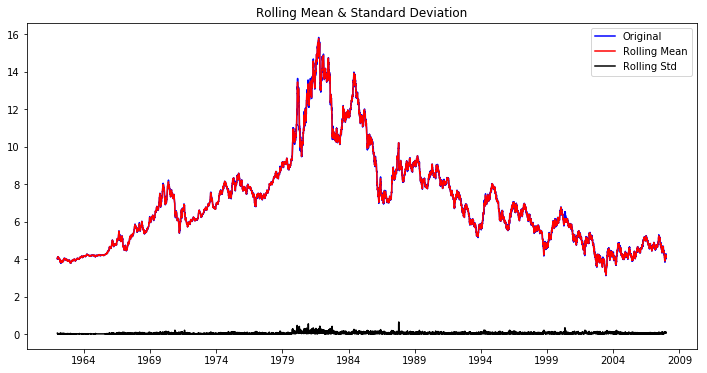

p-value                     0.446030
# of lags                  28.000000
# of observations       14333.000000
Critical Value (5%)        -2.861742
Critical Value (1%)        -3.430806
Critical Value (10%)       -2.566877
dtype: float64


In [451]:
stationarity_test(df)

# Making time-series stationary

## Estimate&Eliminate Trend

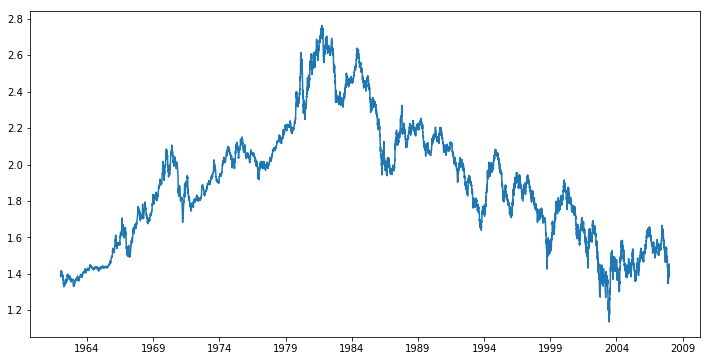

In [452]:
df_log = np.log(df)
plt.plot(df_log)

# Moving average

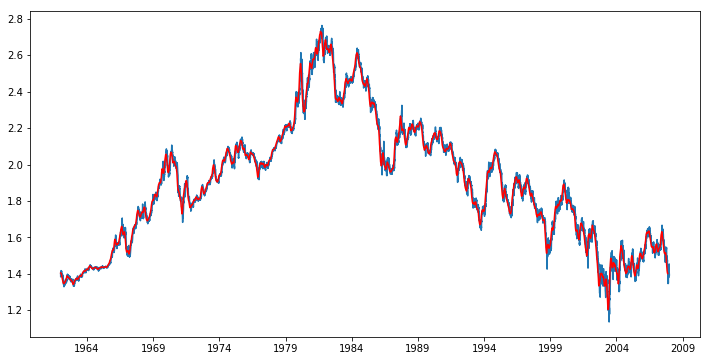

In [453]:
moving_avg = pd.rolling_mean(df_log, 30)
plt.plot(df_log)
plt.plot(moving_avg, color='r')

In [454]:
# Difference 
df_log_moving_avg_diff = df_log - moving_avg
df_log_moving_avg_diff.head(15)

date
2007-12-31   NaN
2007-12-28   NaN
2007-12-27   NaN
2007-12-26   NaN
2007-12-24   NaN
2007-12-21   NaN
2007-12-20   NaN
2007-12-19   NaN
2007-12-18   NaN
2007-12-17   NaN
2007-12-14   NaN
2007-12-13   NaN
2007-12-12   NaN
2007-12-11   NaN
2007-12-10   NaN
Name: 10Y Bond, dtype: float64

In [455]:
# Dropping nan values
df_log_moving_avg_diff.dropna(inplace=True)
df_log_moving_avg_diff.head()

date
2007-11-16    0.027056
2007-11-15    0.017781
2007-11-14    0.043529
2007-11-13    0.046529
2007-11-09    0.033185
Name: 10Y Bond, dtype: float64

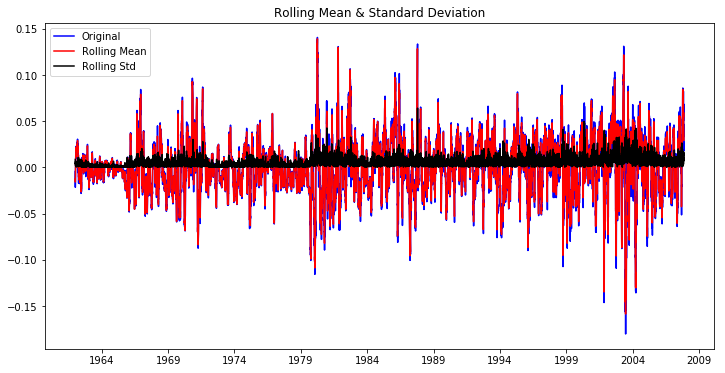

p-value                     0.446030
# of lags                  28.000000
# of observations       14333.000000
Critical Value (5%)        -2.861742
Critical Value (1%)        -3.430806
Critical Value (10%)       -2.566877
dtype: float64


In [456]:
stationarity_test(df_log_moving_avg_diff)

# Exponentially Weighted Moving Average

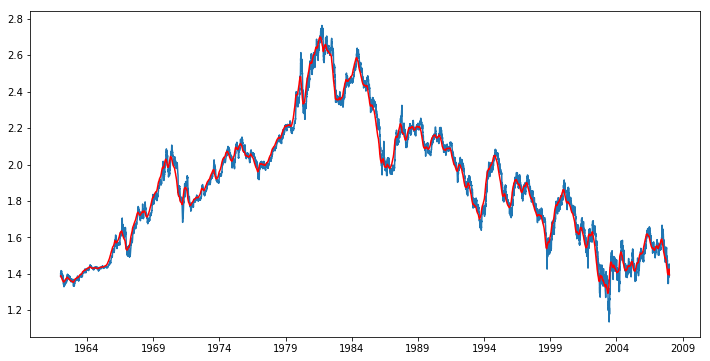

In [457]:
expweighted_avg = pd.ewma(df_log, halflife=25)
plt.plot(df_log)
plt.plot(expweighted_avg, color='r')

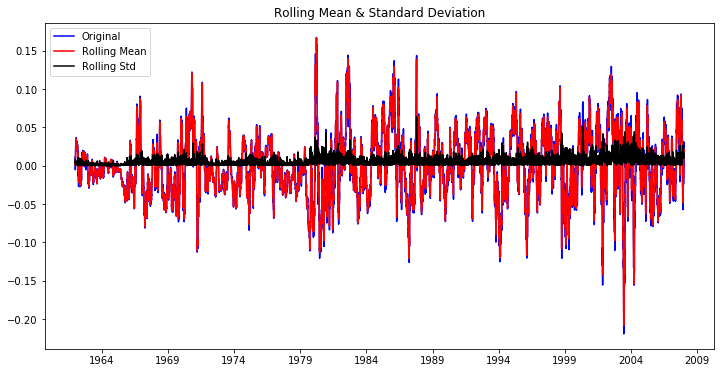

p-value                     0.446030
# of lags                  28.000000
# of observations       14333.000000
Critical Value (5%)        -2.861742
Critical Value (1%)        -3.430806
Critical Value (10%)       -2.566877
dtype: float64


In [458]:
df_log_ewma_diff = df_log - expweighted_avg
stationarity_test(df_log_ewma_diff)

# Eliminating trend

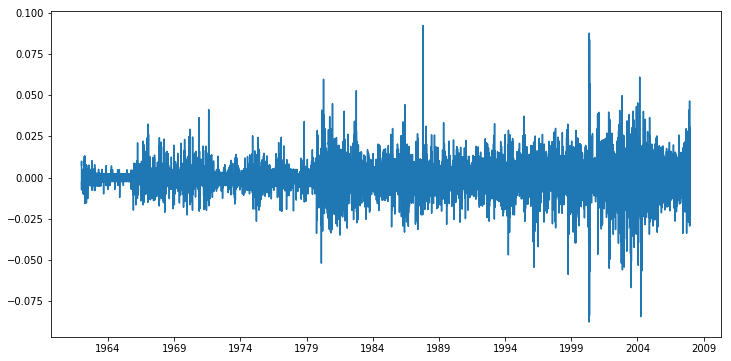

In [459]:
#difference:
df_log_diff = np.log(df).diff().dropna()
plt.plot(df_log_diff)

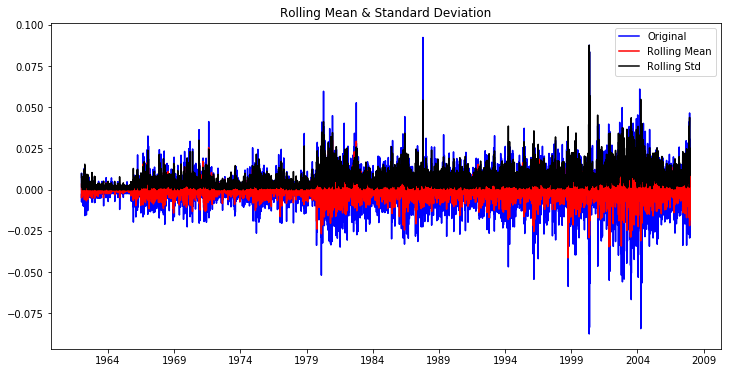

p-value                     0.446030
# of lags                  28.000000
# of observations       14333.000000
Critical Value (5%)        -2.861742
Critical Value (1%)        -3.430806
Critical Value (10%)       -2.566877
dtype: float64


In [460]:
df_log_diff.dropna(inplace=True)
stationarity_test(df_log_diff)

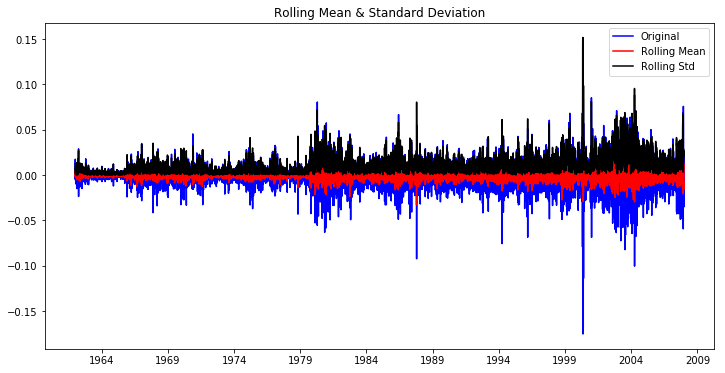

p-value                     0.446030
# of lags                  28.000000
# of observations       14333.000000
Critical Value (5%)        -2.861742
Critical Value (1%)        -3.430806
Critical Value (10%)       -2.566877
dtype: float64


In [461]:
# log difference time series
df_log_diff2 = np.log(df).diff().diff().dropna()

stationarity_test(df_log_diff2)

# Decomposition

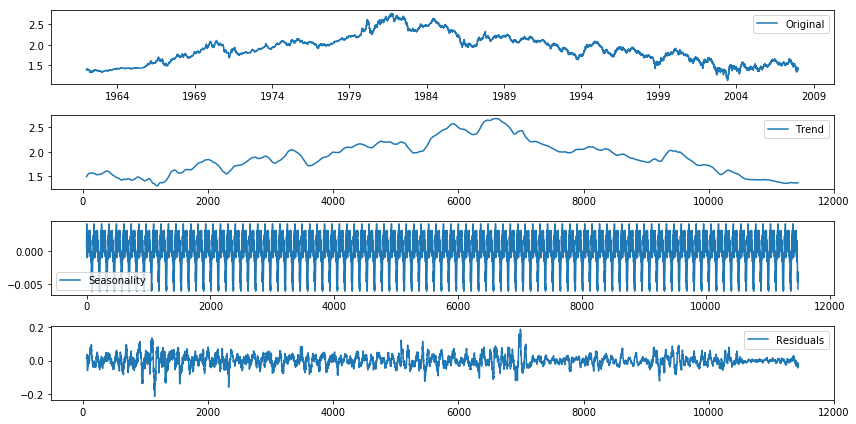

In [462]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_log.values, freq=30*4)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

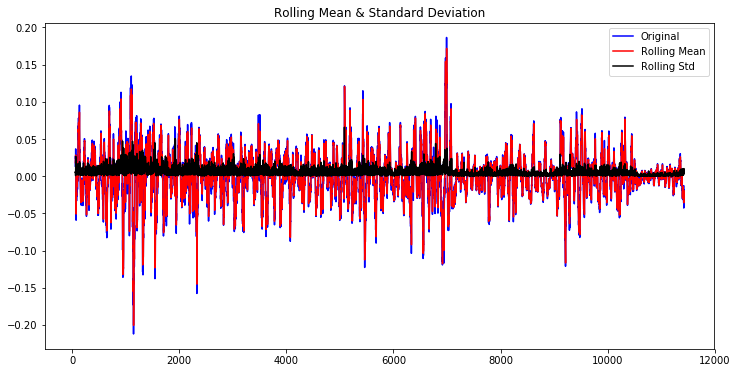

p-value                     0.446030
# of lags                  28.000000
# of observations       14333.000000
Critical Value (5%)        -2.861742
Critical Value (1%)        -3.430806
Critical Value (10%)       -2.566877
dtype: float64


In [463]:
df_log_decompose = residual
stationarity_test(df_log_decompose)

# Final Forecasting


### ACF & PACF Plots 

In [464]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf 

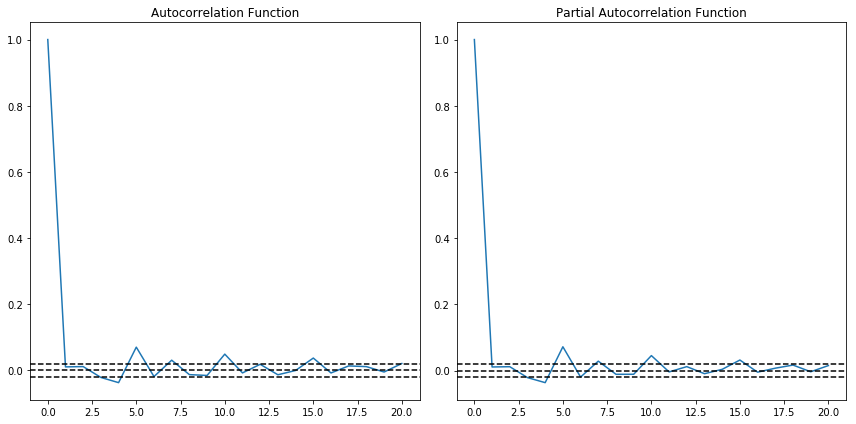

In [465]:

lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## AR Model

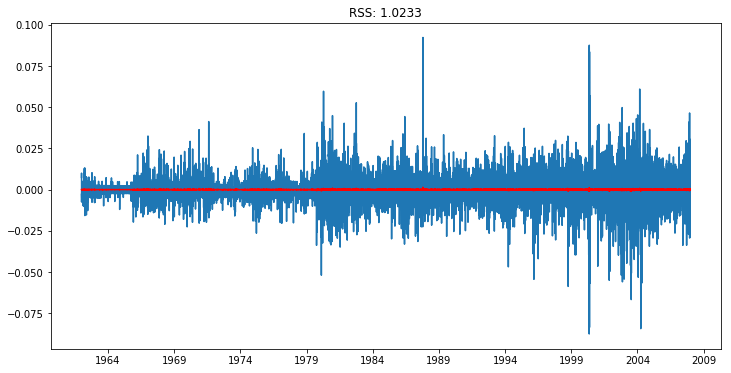

In [466]:
model = ARIMA(df_log, order=(2,1,0))
result_AR = model.fit(disp = -1)
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color= 'r')
plt.title('RSS: %.4f'% sum((result_AR.fittedvalues-df_log_diff)**2))

## MA Model

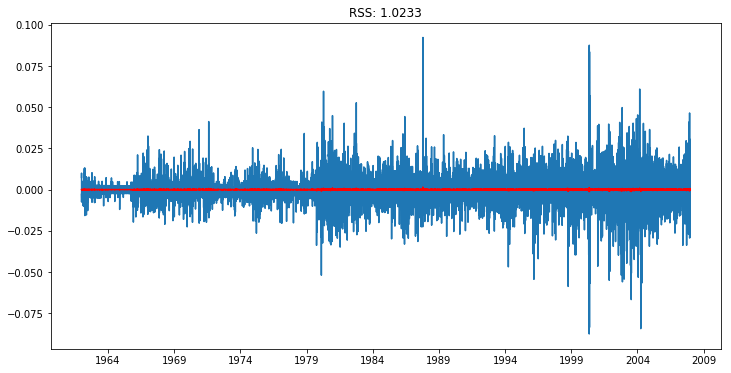

In [467]:
model = ARIMA(df_log, order=(0,1,2))
result_MA = model.fit(disp = -1)
plt.plot(df_log_diff)
plt.plot(result_MA.fittedvalues, color= 'r')
plt.title('RSS: %.4f'% sum((result_MA.fittedvalues-df_log_diff)**2))

## ARIMA Model

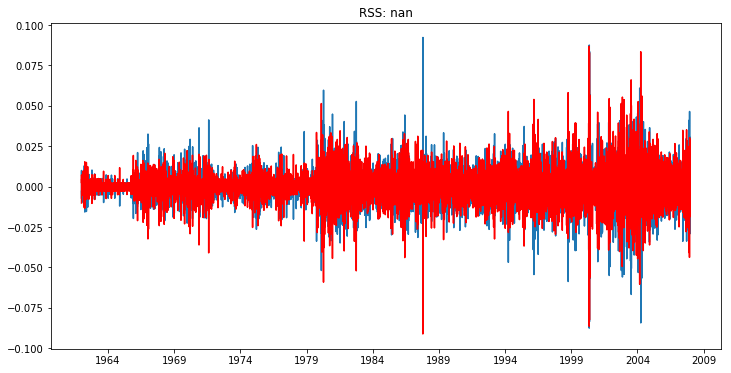

In [468]:
model = ARIMA(df_log_diff , order=(2,1,2))
result_ARIMA = model.fit(disp = -1)
plt.plot(df_log_diff)
plt.plot(result_ARIMA.fittedvalues, color= 'r')
plt.title('RSS: %.4f'% sum((result_ARIMA.fittedvalues-df_log_diff)**2))

## Converting to original

In [469]:
pred_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues*(-2), copy=True)
pred_ARIMA_diff.head()

date
2007-12-27    9.427733e-08
2007-12-26    1.989382e-02
2007-12-24   -1.995540e-03
2007-12-21   -5.347706e-02
2007-12-20   -3.297732e-02
dtype: float64

In [470]:
pred_ARIMA_diff_cumsum = pred_ARIMA_diff.cumsum()
pred_ARIMA_diff_cumsum.head()

date
2007-12-27    9.427733e-08
2007-12-26    1.989392e-02
2007-12-24    1.789838e-02
2007-12-21   -3.557869e-02
2007-12-20   -6.855601e-02
dtype: float64

In [471]:
pred_ARIMA_log = pd.Series(df_log.ix[0], index=df_log.index)
pred_ARIMA_log = pred_ARIMA_log.add(pred_ARIMA_diff_cumsum,fill_value=0)
pred_ARIMA_log.head()

date
1962-01-02    1.255653
1962-01-03    1.235322
1962-01-04    1.249651
1962-01-05    1.253994
1962-01-08    1.263292
dtype: float64

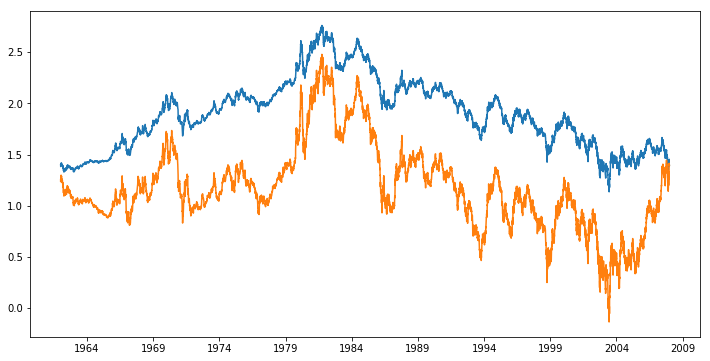

In [472]:
plt.plot(df_log)
plt.plot(pred_ARIMA_log)

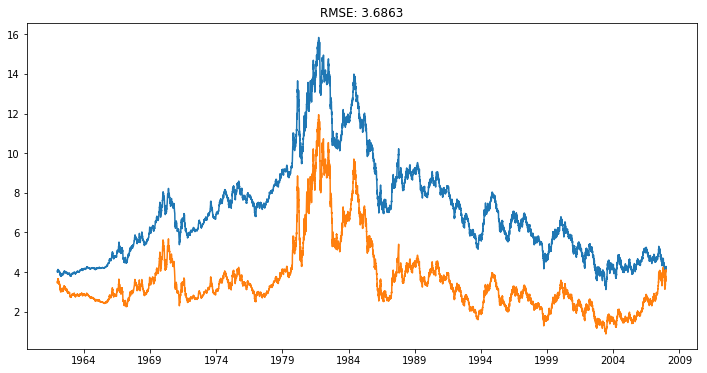

In [473]:
pred_ARIMA = np.exp(pred_ARIMA_log)
plt.plot(df)
plt.plot(pred_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((pred_ARIMA-df)**2)/len(df)))